## 激活函數

In [2]:
import numpy as np
def threshold_function(x):
    y = x > 0
    return y.astype(int)

x = np.array([-1,1,2])
threshold_function(x)


array([0, 1, 1])

In [3]:
def sigmoid_function(x):
    return 1/ (1 + np.exp(-x))

x = np.array([-1,1,2])
sigmoid_function(x)


array([0.26894142, 0.73105858, 0.88079708])

In [4]:
def tangent_function(x):
    return (1 - np.exp(-2*x)) / (1 + np.exp(-2*x))

x = np.array([-1,1,2])
tangent_function(x)


array([-0.76159416,  0.76159416,  0.96402758])

In [5]:
def relu_function(x):
    return np.maximum(0,x)

x = np.array([-1,1,2])
relu_function(x)


array([0, 1, 2])

## 訓練神經網路

In [6]:
import numpy
X = numpy.array([70, 20, 300])
W = numpy.array([[20], [-6], [-1]])

In [7]:
X.shape

(3,)

In [8]:
W.shape

(3, 1)

In [9]:
numpy.dot(X, W)

array([980])

In [10]:
network = {}
network['w1'] = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
network['b1'] = np.array([0.1,0.2,0.3])
network['w2'] = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
network['b2'] = np.array([0.1,0.2])

In [11]:
network['w1'].shape

(2, 3)

In [12]:
network['b1'].shape

(3,)

In [13]:
network['w2'].shape

(3, 2)

In [14]:
network['b2'].shape

(2,)

In [15]:
x = np.array([1,0.5])
x.shape


(2,)

In [16]:
network['w1'].shape


(2, 3)

In [17]:
a1 = np.dot(x, network['w1']) + network['b1']
a1.shape


(3,)

In [18]:
z1 = sigmoid_function(a1)
z1


array([0.57444252, 0.66818777, 0.75026011])

In [19]:
y = np.dot(z1, network['w2']) + network['b2']
y

array([0.51615984, 1.21402696])

## 梯度下降

In [20]:
def func(x):
    return x ** 2 

func(3)

9

In [21]:
def dfunc(f, x):
    h = 1e-4 
    return (f(x+h) - f(x)) / (h)

In [22]:
dfunc(func, 3)

6.000100000012054

Populating the interactive namespace from numpy and matplotlib


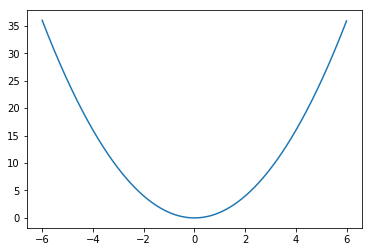

In [23]:
%pylab inline
import matplotlib.pyplot as plt

x = np.arange(-6, 6, 0.01)
y = func(x)
plt.plot(x, y)

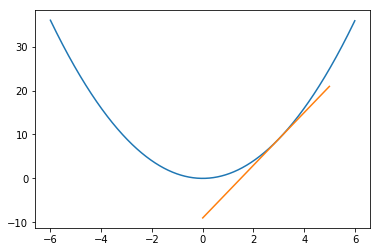

In [24]:
import matplotlib.pyplot as plt
def tfunc(f, x, t):
    d = dfunc(f, x)
    y = f(x) - d*x
    return d*t + y

x = np.arange(-6, 6, 0.01)
y = func(x)
plt.plot(x, y)

x2 = np.arange(0, 5, 0.01)
y2 = tfunc(func, 3, x2)
plt.plot(x2, y2)
plt.show()

In [25]:
def gradient_descent(func, init_x, lr = 0.3, epochs = 100):    
    x = init_x       
    res = [x]
    for i in range(epochs):         
        grad = dfunc(func,x)        
        x = x - grad * lr
        res.append(x)
    return np.array(res)

def dfunc(f, x):
    h = 1e-4 
    return (f(x+h) - f(x-h)) / (2*h)

In [26]:
x = gradient_descent(func, -5, lr=0.8)

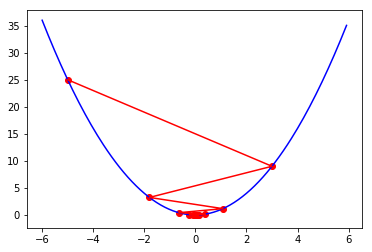

In [27]:
t = np.arange(-6.0, 6.0, 0.08)
plt.plot(t, func(t), c='b')
plt.plot(x, func(x), c='r')    
plt.scatter(x, func(x), c='r')    
plt.show()

In [28]:
x = gradient_descent(func, -5, lr=1)

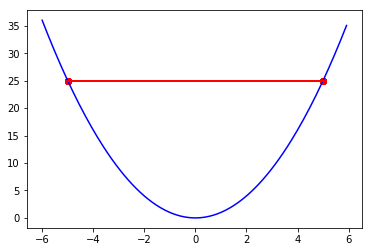

In [29]:
t = np.arange(-6.0, 6.0, 0.08)
plt.plot(t, func(t), c='b')
plt.plot(x, func(x), c='r')    
plt.scatter(x, func(x), c='r')    
plt.show()

In [30]:
x = gradient_descent(func, -5, lr=0.01)

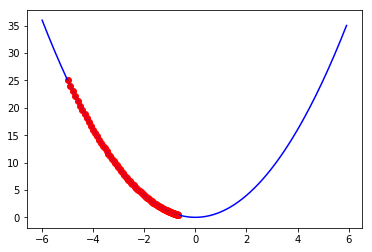

In [31]:
t = np.arange(-6.0, 6.0, 0.08)
plt.plot(t, func(t), c='b')
plt.plot(x, func(x), c='r')    
plt.scatter(x, func(x), c='r')    
plt.show()

## 使用ANN 建立預測模型

In [32]:
import numpy as np

In [33]:
def softmax_function(x):
    return np.exp(x) / np.sum(np.exp(x))

def sigmoid_function(x):
    return 1/ (1 + np.exp(-x))

def dfunc(f, x):
    h = 1e-4 
    grad = np.zeros_like(x)
    it = np.nditer(x, flags=['multi_index'])
    while not it.finished:     
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
        it.iternext()   
    return grad

def cross_entropy_err(y_hat, y):
    delta = 1e-8
    return -np.sum(y*np.log(y_hat + delta))

In [34]:
class ANN:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
 
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid_function(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax_function(a2)
        return y
        
    def loss(self, x, y):
        y_hat = self.predict(x)
        return cross_entropy_err(y_hat, y)
        
    def numerical_gradient(self, x, y):
        loss_W = lambda W: self.loss(x, y)
        grads = {}
        grads['W1'] = dfunc(loss_W, self.params['W1'])
        grads['b1'] = dfunc(loss_W, self.params['b1'])
        grads['W2'] = dfunc(loss_W, self.params['W2'])
        grads['b2'] = dfunc(loss_W, self.params['b2'])
        return grads

In [35]:
net = ANN(input_size=4, hidden_size=5, output_size=3)

In [36]:
from sklearn.datasets import load_iris
iris = load_iris()
x= iris.data

In [37]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [38]:
x[0:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [39]:
iris.target[0:3]

array([0, 0, 0])

In [40]:
y = np.zeros((len(iris.target), 3))
for idx, val in enumerate(iris.target):
    y[idx, val] = 1

In [41]:
y[0:3]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [42]:
import time
epochs = 3000
lr     = 0.01
a = time.clock()
train_loss = []
for i in range(epochs):         
    grad = net.numerical_gradient(x,y)
    for key in ('W1', 'b1', 'W2', 'b2'):
        net.params[key] = net.params[key] - lr * grad[key]
    loss = net.loss(x, y)
    train_loss.append(loss)
time.clock() - a

15.650120000000001

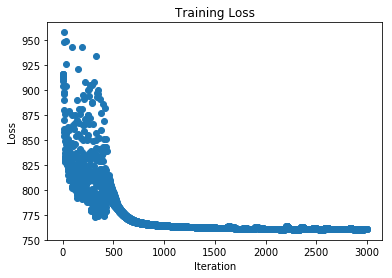

In [43]:
import matplotlib.pyplot as plt
plt.scatter(range(0,3000),train_loss)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()